# PCA for dataset 1

In [1]:
import torch as t
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

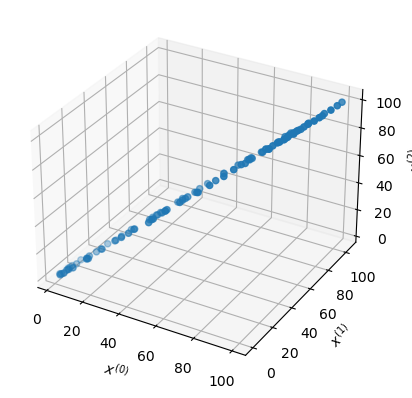

In [2]:
x1=np.random.uniform(0,100,100)
e=np.random.uniform(-5,5,100)
f=np.random.uniform(-0.5,0.5,100)
x2=x1+e
x3=x1+f
ax = plt.axes(projection ='3d')
ax.scatter(x1,x2,x3)
ax.set_xlabel('$x^{(0)}$')
ax.set_ylabel('$x^{(1)}$')
ax.set_zlabel('$x^{(2)}$')

plt.show()

Text(0, 0.5, 'x3')

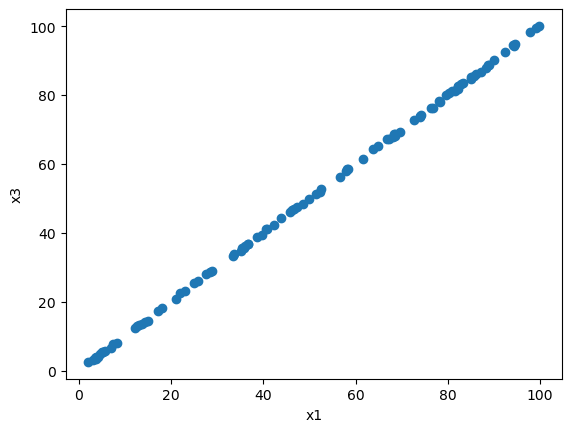

In [3]:
plt.scatter(x1,x3)
plt.xlabel('x1')
plt.ylabel('x3')

Text(0, 0.5, 'x2')

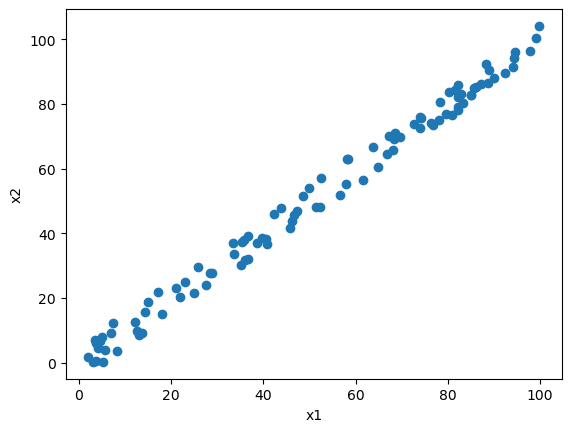

In [4]:
plt.scatter(x1,x2)
plt.xlabel('x1')
plt.ylabel('x2')

In [5]:
x0=np.stack((x1,x2,x3))

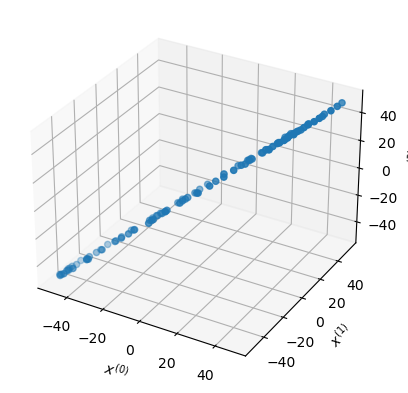

In [6]:
mx1=0
mx2=0
mx3=0
for i in range(100):
    mx1=mx1+x1[i]
    mx2=mx2+x2[i]
    mx3=mx3+x3[i]
mx1=mx1/100
mx2=mx2/100
mx3=mx3/100
x11=x1-mx1
x22=x2-mx2
x33=x3-mx3
ax = plt.axes(projection ='3d')
ax.scatter(x11,x22,x33)
ax.set_xlabel('$x^{(0)}$')
ax.set_ylabel('$x^{(1)}$')
ax.set_zlabel('$x^{(2)}$')
plt.show()
x=np.stack((x11,x22,x33))
Rx=x@np.transpose(x)
Rx=Rx/x.shape[1]

In [7]:
Ev,EV=np.linalg.eig(Rx)
#np.shape(x11)
#Ev=np.sort(Ev)
sorted_index = np.argsort(-Ev)
Ev = Ev[sorted_index]
EV = EV[:, sorted_index]


(3, 100)

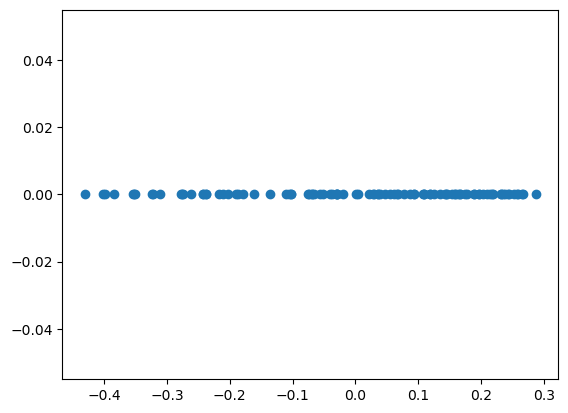

In [8]:
#y1=np.transpose(EV)@x[:,0]
#y2=np.transpose(EV)@x22
#y3=np.transpose(EV)@x22
#plt.scatter(y1,np.zeros(100))
#np.shape(y1)
Y=np.transpose(EV)@x
plt.scatter(Y[2,:],np.zeros(100))
np.shape(Y)

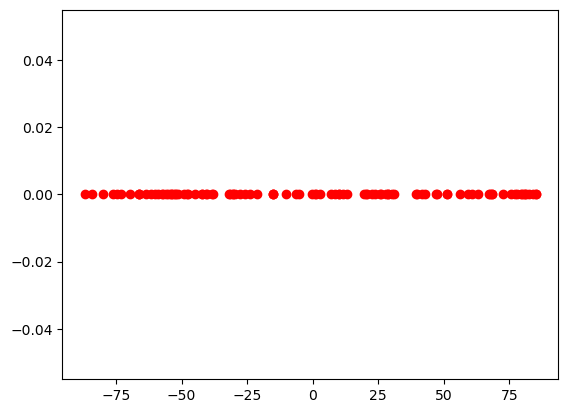

In [9]:
plt.scatter(Y[0,:],np.zeros(100),color='red')

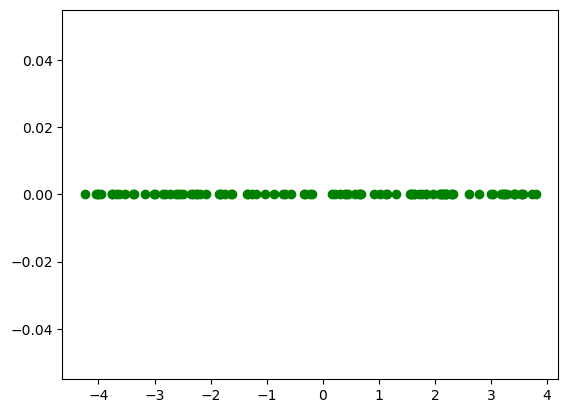

In [10]:
plt.scatter(Y[1,:],np.zeros(100),color='green')

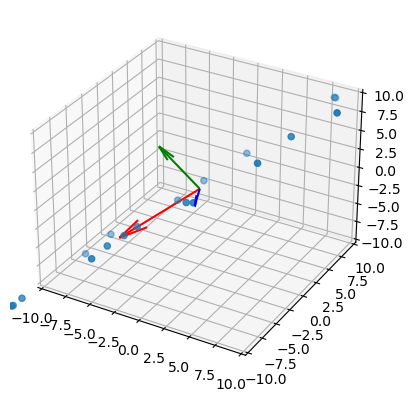

In [11]:
eig_vect1 = EV[:,0]
eig_vect2 = EV[:,2]
eig_vect3=EV[:,1]
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
ax.set_zlim([-10,10])
start=[0,0,0]
ax.quiver(start[0],start[1],start[2],eig_vect1[0]*Ev[0]/300,eig_vect1[1]*Ev[0]/300,eig_vect1[2]*Ev[0]/300,color='red')
ax.quiver(start[0],start[1],start[2],eig_vect2[0]*Ev[1],eig_vect2[1]*Ev[1],eig_vect2[2]*Ev[1],color='green')
ax.quiver(start[0],start[1],start[2],eig_vect3[0]*Ev[2]*200,eig_vect3[1]*Ev[2]*200,eig_vect3[2]*Ev[2]*200,color='blue')
ax.scatter(x11,x22,x33)



In [12]:
#Y=np.stack((y1,y2,y3))
RY=Y@np.transpose(Y)/Y.shape[1]
RY

array([[ 2.68512441e+03, -2.87059265e-14,  1.51558766e-13],
       [-2.87059265e-14,  5.85431440e+00, -1.23767663e-14],
       [ 1.51558766e-13, -1.23767663e-14,  3.79225735e-02]])

In [13]:
R_Y=np.transpose(EV)@Rx@EV
R_Y

array([[ 2.68512441e+03,  0.00000000e+00,  2.27373675e-13],
       [ 2.35145237e-13,  5.85431440e+00,  1.55431223e-14],
       [ 2.63539190e-13, -1.95711503e-14,  3.79225735e-02]])

Text(0.5, 0, '$xh^{(2)}$')

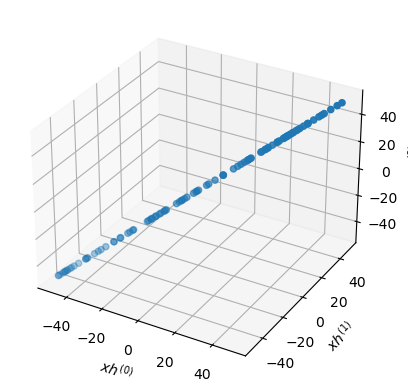

In [14]:
#m=1
Xh0=(EV[:,0].reshape(3,1))@Y[0,:].reshape(1,100)
ax = plt.axes(projection ='3d')
ax.scatter(Xh0[0,:],Xh0[1,:],Xh0[2,:])
ax.set_xlabel('$xh^{(0)}$')
ax.set_ylabel('$xh^{(1)}$')
ax.set_zlabel('$xh^{(2)}$')

Text(0.5, 0, '$xh^{(2)}$')

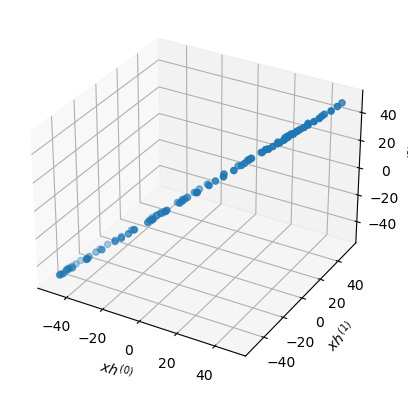

In [15]:
#m=2
Xh1=(EV[:,0:2])@Y[0:2,:]
ax = plt.axes(projection ='3d')
ax.scatter(Xh1[0,:],Xh1[1,:],Xh1[2,:])
ax.set_xlabel('$xh^{(0)}$')
ax.set_ylabel('$xh^{(1)}$')
ax.set_zlabel('$xh^{(2)}$')
#np.shape(Xh)

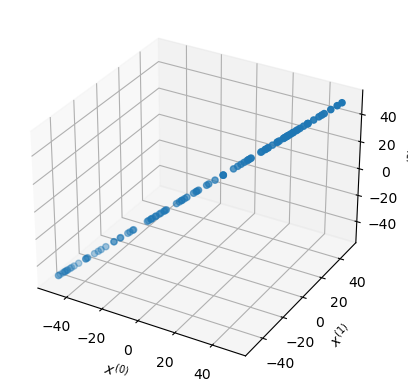

In [16]:
#m=1,undoing effect
mxh1=0
mxh2=0
mxh3=0
for i in range(100):
    mxh1=mxh1+Xh0[0,i]
    mxh2=mxh2+Xh0[1,i]
    mxh3=mxh3+Xh0[2,i]
mxh1=mxh1/100
mxh2=mxh2/100
mxh3=mxh3/100
x11=Xh0[0,:]+mxh1
x22=Xh0[1,:]+mxh2
x33=Xh0[2,:]+mxh3
ax = plt.axes(projection ='3d')
ax.scatter(x11,x22,x33)
ax.set_xlabel('$x^{(0)}$')
ax.set_ylabel('$x^{(1)}$')
ax.set_zlabel('$x^{(2)}$')
plt.show()

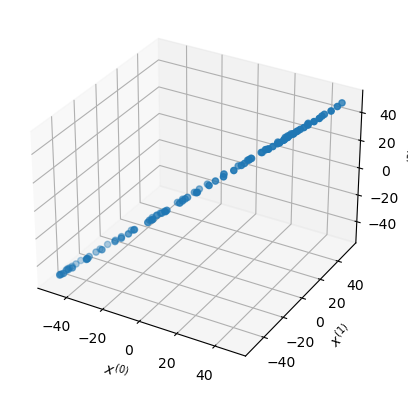

In [17]:
#m=2,undoing effect
mxh1=0
mxh2=0
mxh3=0
for i in range(100):
    mxh1=mxh1+Xh1[0,i]
    mxh2=mxh2+Xh1[1,i]
    mxh3=mxh3+Xh1[2,i]
mxh1=mxh1/100
mxh2=mxh2/100
mxh3=mxh3/100
x11=Xh1[0,:]+mxh1
x22=Xh1[1,:]+mxh2
x33=Xh1[2,:]+mxh3
ax = plt.axes(projection ='3d')
ax.scatter(x11,x22,x33)
ax.set_xlabel('$x^{(0)}$')
ax.set_ylabel('$x^{(1)}$')
ax.set_zlabel('$x^{(2)}$')
plt.show()

In [18]:
#m=1,mse
mse1=Ev[1]+Ev[2]
#m=2,mse
mse2=Ev[2]
mse1

5.892236977086293

Text(0.5, 0, '$x^{(2)}$')

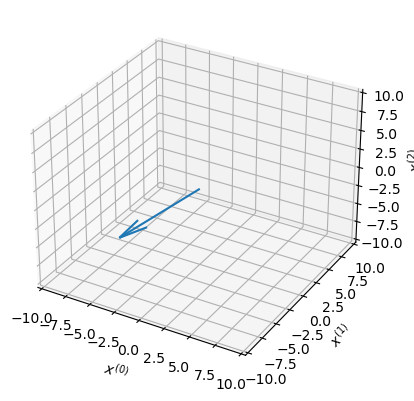

In [19]:
#m=1
eig_vect1 = EV[:,0]
eig_vect2 = EV[:,1]
#origin = [0, 0, 0]
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
ax.set_zlim([-10,10])
start=[0,0,0]
ax.quiver(start[0],start[1],start[2],eig_vect1[0]*Ev[0]/300,eig_vect1[1]*Ev[0]/300,eig_vect1[2]*Ev[0]/300)
ax.set_xlabel('$x^{(0)}$')
ax.set_ylabel('$x^{(1)}$')
ax.set_zlabel('$x^{(2)}$')


Text(0.5, 0, '$x^{(2)}$')

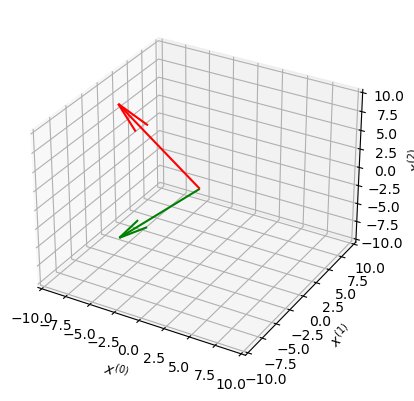

In [20]:
#m=2
eig_vect1 = EV[:,0]
eig_vect2 = EV[:,2]
#origin = [0, 0, 0]
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
ax.set_zlim([-10,10])
start=[0,0,0]
ax.quiver(start[0],start[1],start[2],eig_vect1[0]*Ev[0]/300,eig_vect1[1]*Ev[0]/300,eig_vect1[2]*Ev[0]/300,color='green')
ax.quiver(start[0],start[1],start[2],eig_vect2[0]*Ev[1]*2,eig_vect2[1]*Ev[1]*2,eig_vect2[2]*Ev[1]*2,color='red')
#the second eigen value is relatively low compared to first eigen value , so I multiplied it with a factor of 10 and divided the first eigen value with 300 to show them in plot
ax.set_xlabel('$x^{(0)}$')
ax.set_ylabel('$x^{(1)}$')
ax.set_zlabel('$x^{(2)}$')

# PCA for data set 2

In [21]:
from sklearn.datasets import fetch_olivetti_faces
import torch as t
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

# Olivetti faces dataset
olivetti = fetch_olivetti_faces()
x = olivetti.images
print("Original x shape:", x.shape)
X = x.reshape((400, 4096))
Z=np.transpose(X)
print("New x shape:", X.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/apple/scikit_learn_data
Original x shape: (400, 64, 64)
New x shape: (400, 4096)


In [22]:
#subtracting mean
for i in range(len(X[0,:])):
    X[:,i]=X[:,i]-np.mean(X[:,i])

In [23]:
#finding covariance matrix
RX=np.transpose(X)@X/400
#np.shape(cv)

In [24]:
#finding eigen values and eigen vectors(A) of covariance matrix
[e,ev]=np.linalg.eig(RX)
sorted_index = np.argsort(-e)
e = e[sorted_index]
ev = ev[:, sorted_index]

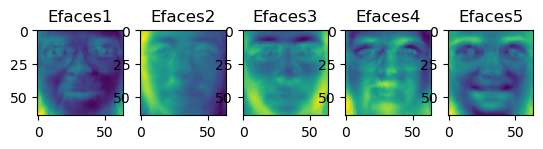

In [25]:
#plotting Eigen faces or vectors using PCA
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(ev[:,i].reshape(64,64))
    plt.title(f"Efaces{i+1}")

In [26]:
#finding m such that error is less than 5%
err=0
m=0
for i in range(len(e)):
    err=err+e[i]
    m=m+1
    if err>(0.95*np.sum(e)):
        break
m

123

In [27]:
#1%
err=0
n=0
for i in range(len(e)):
    err=err+e[i]
    n=n+1
    if err>(0.99*np.sum(e)):
        break
n

260

In [28]:
#10%
err=0
p=0
for i in range(len(e)):
    err=err+e[i]
    p=p+1
    if err>(0.90*np.sum(e)):
        break
p

66

In [29]:
#20%
err=0
q=0
for i in range(len(e)):
    err=err+e[i]
    q=q+1
    if err>(0.80*np.sum(e)):
        break
q

27

In [30]:
Y1=np.transpose(ev[:,0:n])@X[0,:].reshape(4096,1)
Y2=np.transpose(ev[:,0:m])@X[0,:].reshape(4096,1)
Y3=np.transpose(ev[:,0:p])@X[0,:].reshape(4096,1)
Y4=np.transpose(ev[:,0:q])@X[0,:].reshape(4096,1)


In [31]:
xh1=ev[:,0:n]@(Y1)
xh2=ev[:,0:m]@(Y2)
xh3=ev[:,0:p]@(Y3)
xh4=ev[:,0:q]@(Y4)
    

In [32]:
xh1=xh1.reshape(64,64)
xh2=xh2.reshape(64,64)
xh3=xh3.reshape(64,64)
xh4=xh4.reshape(64,64)

Text(0.5, 1.0, 'Original Image')

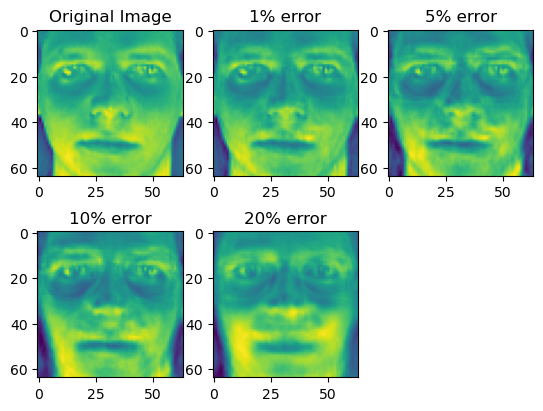

In [33]:
plt.subplot(2,3,2)
plt.imshow(xh1.real)
plt.title("1% error")
plt.subplot(2,3,3)
plt.imshow(xh2.real)
plt.title("5% error")
plt.subplot(2,3,4)
plt.imshow(xh3.real)
plt.title("10% error")
plt.subplot(2,3,5)
plt.imshow(xh4.real)
plt.title("20% error")
plt.subplot(2,3,1)
plt.imshow(X[0,:].reshape(64,64))
plt.title("Original Image")

In [34]:
#Calculating mean square error
err = np.sum((X[0,:].reshape(64,64).astype("float") - xh4.real.astype("float")) ** 2)
err /= float(x[1].shape[0] * xh1.shape[1])
err*100

0.3185229676942323

Text(0.5, 1.0, 'Error image')

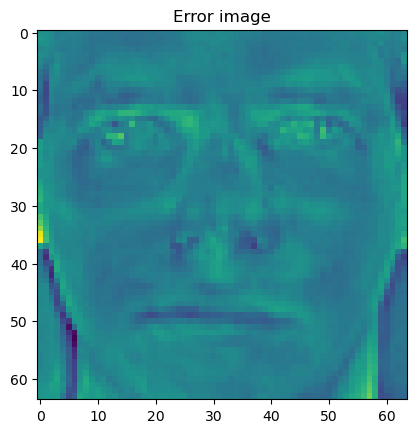

In [35]:
err=X[0,:].reshape(64,64)-xh4
plt.imshow(err)
plt.title("Error image")

In [36]:
Y=X@ev

In [37]:
np.shape(Y)

(400, 4096)

In [38]:
z=Y[0,:]
len(z)

4096

In [ ]:
r=np.zeros(len(z))
mse=np.zeros(len(z))
zim=np.zeros(len(z))
for i in range(len(z)):
    zim[0:i]=z[0:i]
    r=ev@np.transpose(zim)
    error=r-X[0,:]
    mse[i]=(error@error/len(z))*100
plt.plot(mse)
plt.title("mse vs eigen vectors")